<a href="https://colab.research.google.com/github/AngusYeh/data-science/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns
#print(device_lib.list_local_devices())

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Flatten
import keras.datasets as dataset

In [ ]:
device = tf.config.experimental.list_physical_devices(device_type='GPU')
print(len(device))
tf.config.experimental.set_memory_growth(device[0], True)

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.mnist.load_data()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_test_n = X_test.reshape(-1,(28*28))

In [ ]:
X_train_n = X_train.reshape(-1,(28*28))

In [ ]:
model = keras.Sequential([
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(X_train_n,y_train,batch_size=64,epochs=5)

Epoch 1/5
938/938 [==============================] - 8s 5ms/step - loss: 0.3316 - accuracy: 0.9055
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1483 - accuracy: 0.9554
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1089 - accuracy: 0.9668
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0871 - accuracy: 0.9734
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0717 - accuracy: 0.9773


In [ ]:
pred = model.predict(X_test_n)

In [ ]:
class_name = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
predict = np.argmax(pred,axis=1)

In [ ]:
predict[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test,predict)
#cm

In [ ]:
plt.colormaps()

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(cm,cmap='RdBu',annot=True)

# OS

In [ ]:
import os
import glob
import pathlib
import random
import shutil
import PIL

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Cat.vs.Dog')

In [ ]:
#取得目前路徑
data_path = os.getcwd()
img_path = data_path + '/training/dog'

In [ ]:
data_dir = pathlib.Path(data_path)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/Cat.vs.Dog')

In [ ]:
cats_test = list(glob.glob('test_set/cats/*.jpg'))
#dogs_test = list(data_dir.glob('test_set/dogs/*.jpg'))
#cats_train = list(data_dir.glob('training_set/cats/*.jpg'))
#dogs_train = list(data_dir.glob('training_set/dogs/*.jpg'))

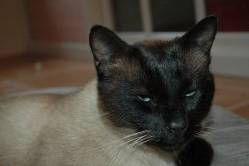

In [ ]:
PIL.Image.open(str(cats_test[500]))

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

In [ ]:
if os.path.isdir('train/cat') is False:
  os.makedirs('train/cat')
  os.makedirs('train/dog')
  os.makedirs('test/cat')
  os.makedirs('test/dog')

In [ ]:
os.makedirs('val/cat')
os.makedirs('val/dog')

In [ ]:
for c in random.sample(glob.glob('training_set/cats/*.jpg'),150):
  shutil.copy(c,'val/cat')
for c in random.sample(glob.glob('test_set/cats/*.jpg'),150):
  shutil.copy(c,'val/cat')
for c in random.sample(glob.glob('training_set/dogs/*.jpg'),150):
  shutil.copy(c,'val/dog')
for c in random.sample(glob.glob('test_set/dogs/*.jpg'),150):
  shutil.copy(c,'val/dog')

In [ ]:
for c in random.sample(glob.glob('training_set/cats/*.jpg'),500):
  shutil.copy(c,'train/cat')
for c in random.sample(glob.glob('training_set/dogs/*.jpg'),500):
  shutil.copy(c,'train/dog')
for c in random.sample(glob.glob('test_set/cats/*.jpg'),50):
  shutil.copy(c,'test/cat')
for c in random.sample(glob.glob('test_set/dogs/*.jpg'),50):
  shutil.copy(c,'test/dog')

In [ ]:
image_size = (160, 160)
batch_size = 32

In [ ]:
#Tensorflow 2.3.0以後版本
training_dataset = image.image_dataset_from_directory(
    "train",
    #validation_split=0.2,
    #subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred'
)

Found 1000 files belonging to 2 classes.


In [ ]:
for image_batch, labels_batch in training_dataset.take(1):
  print(labels_batch)
  break

tf.Tensor([1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1], shape=(32,), dtype=int32)


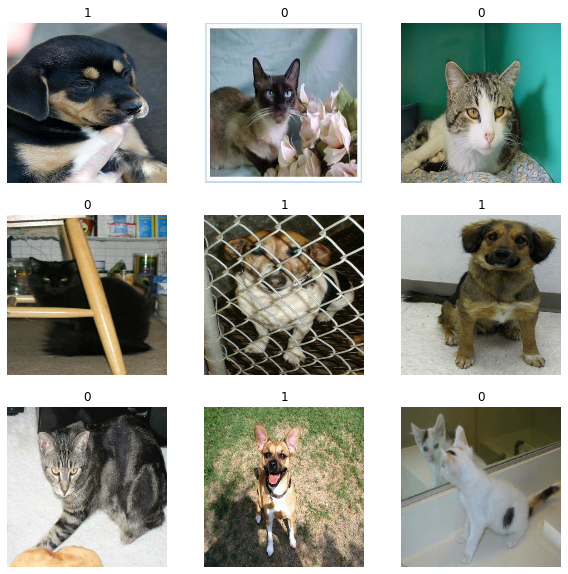

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
validation_dataset = image.image_dataset_from_directory(
    "val",
    #validation_split=0.2,
    #subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,    
)

Found 600 files belonging to 2 classes.


In [ ]:
test_dataset = image.image_dataset_from_directory(
    "test",
    #validation_split=0.2,
    #subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,    
)

Found 100 files belonging to 2 classes.


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 0


In [ ]:
#TF.ver2.3.0之前載入image_Dataset的方法
#test_images = image.ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory='./test',target_size=(224,224),batch_size=10)

Found 100 images belonging to 2 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = training_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
#定義資料增長
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
#呼叫 模型mobilenet的input處理
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
#base model
IMG_SHAPE = image_size+(3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
#凍結
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid')
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

In [ ]:
#builting Funcitional model
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_dataset,epochs=5,validation_data=validation_dataset,verbose=2)

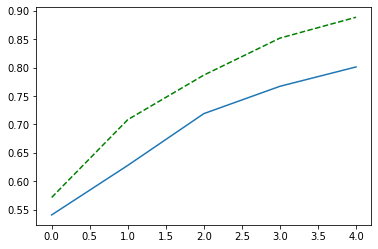

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
#fig,ax = plt.subplots(2,1)
fig = plt.figure()
plt.plot(acc)
plt.plot(val,'g--')

In [ ]:
pred = model.predict(x=test_dataset,verbose=2)

4/4 - 1s - 930ms/epoch - 232ms/step


In [ ]:
iter = iter(test_dataset)

In [ ]:
model_net = keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model_net.summary()

In [ ]:
cats_test[500]

'test_set/cats/cat.4377.jpg'

In [ ]:
img = image.load_img(cats_test[500], target_size=(224, 224))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)
preds = model_net.predict(x)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

In [ ]:
print(preds.shape)

(1, 7, 7, 1280)


In [ ]:
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02123597', 'Siamese_cat', 0.58575577), ('n02124075', 'Egyptian_cat', 0.023174502), ('n02123045', 'tabby', 0.01525928)]


# CNN TEST

In [ ]:
model_ = keras.Sequential([
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(180,180,3)),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(2,activation='softmax'),

])

In [ ]:
model_.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(x=train_data,epochs=5,verbose=2,validation_data=test_data,batch_size=32)